In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
csv_path = "/content/drive/MyDrive/Colab Notebooks/IMDB_Dataset.csv"
df = pd.read_csv(csv_path)

In [4]:
df.sample(5)

,review,sentiment
5180,"When I say "" Doctor Who "" you might conjure up...",negative
33584,And I do. Peter Falk has created a role that w...,positive
16727,This is a really great film! It gets you think...,positive
40614,This 1947 film stars and was directed and writ...,positive
22426,I am so glad when i watch in every time the mo...,positive


In [5]:
df.shape

(50000, 2)

1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['sentiment'] = encoder.fit_transform(df['sentiment'])

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [10]:
# missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

418

In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(49582, 2)

2. **EDA**

In [15]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [16]:
df['sentiment'].value_counts()

1    24884
0    24698
Name: sentiment, dtype: int64

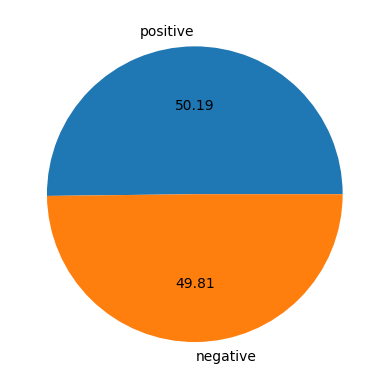

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['sentiment'].value_counts(), labels=['positive','negative'],autopct="%0.2f")
plt.show()

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
df['num_characters'] = df['review'].apply(len)

In [21]:
df.head()

,review,sentiment,num_characters
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317


In [22]:
# num of words
df['num_words'] = df['review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,review,sentiment,num_characters,num_words
0,One of the other reviewers has mentioned that ...,1,1761,380
1,A wonderful little production. <br /><br />The...,1,998,201
2,I thought this was a wonderful way to spend ti...,1,926,205
3,Basically there's a family where a little boy ...,0,748,175
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283


In [24]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,49582.000000,49582.000000
mean,1310.568230,279.711226
std,990.762238,208.167050
min,32.000000,8.000000
25%,699.000000,151.000000
50%,971.000000,209.000000
75%,1592.000000,340.000000
max,13704.000000,2911.000000


In [25]:
# ham
df[df['sentiment'] == 0][['num_characters','num_words']].describe()

,num_characters,num_words
count,24698.000000,24698.000000
mean,1294.739615,278.771358
std,946.501793,201.449273
min,32.000000,8.000000
25%,706.000000,153.000000
50%,974.000000,211.000000
75%,1568.000000,338.000000
max,8969.000000,1936.000000


In [26]:
#spam
df[df['sentiment'] == 1][['num_characters','num_words']].describe()

,num_characters,num_words
count,24884.000000,24884.000000
mean,1326.278532,280.644068
std,1032.597204,214.626786
min,65.000000,11.000000
25%,692.000000,148.000000
50%,969.000000,207.000000
75%,1615.250000,343.000000
max,13704.000000,2911.000000


In [27]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

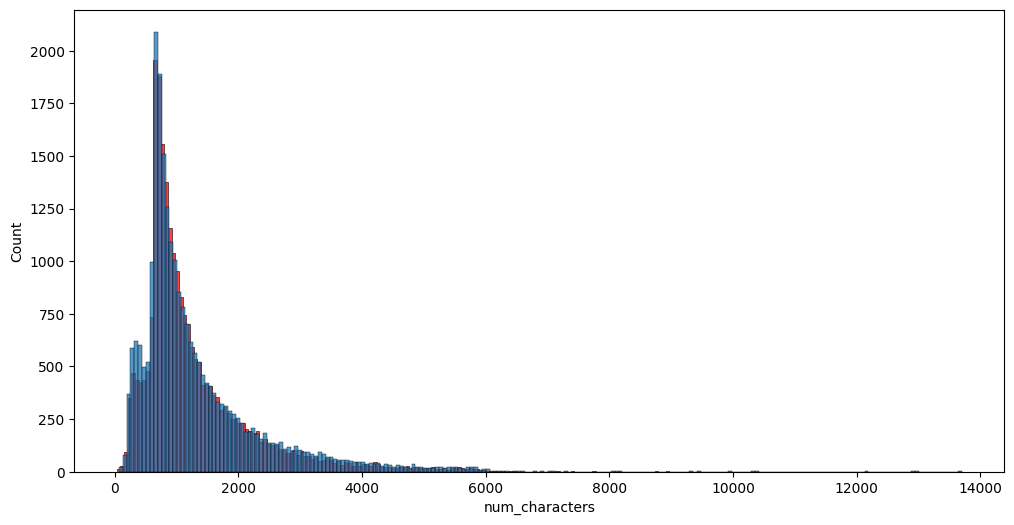

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['sentiment'] == 0]['num_characters'],color='red')
sns.histplot(df[df['sentiment'] == 1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

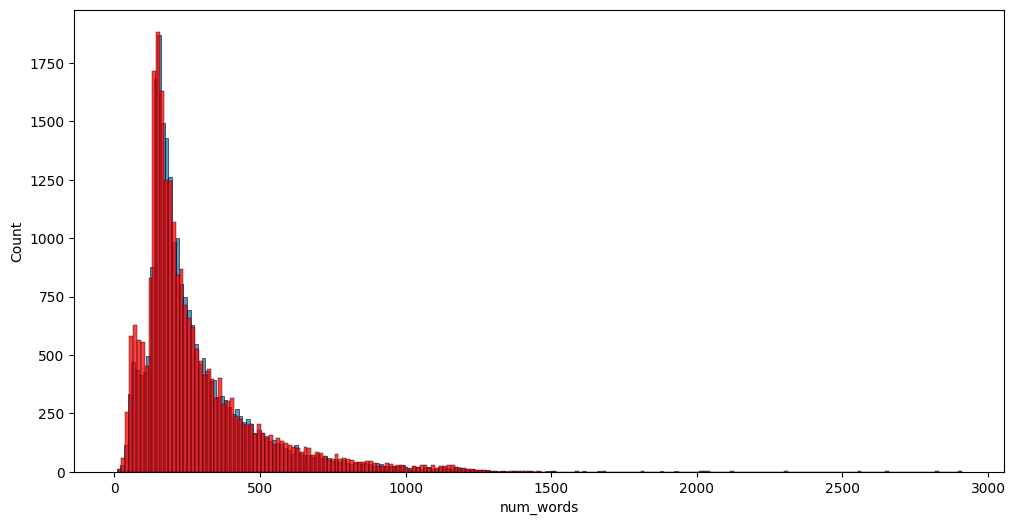

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['sentiment'] == 0]['num_words'])
sns.histplot(df[df['sentiment'] == 1]['num_words'],color='red')

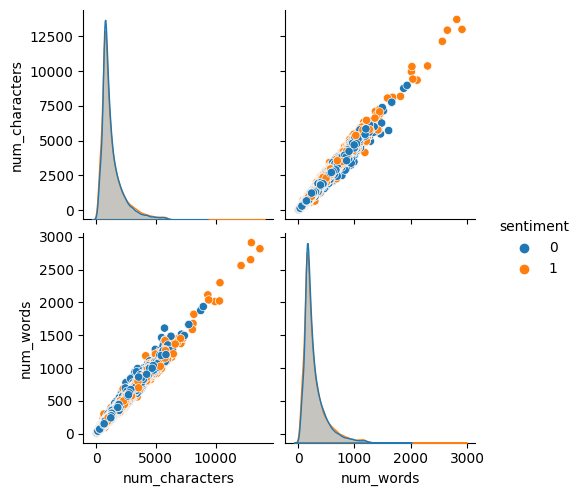

In [30]:
sns.pairplot(df,hue='sentiment')

<ipython-input-31-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

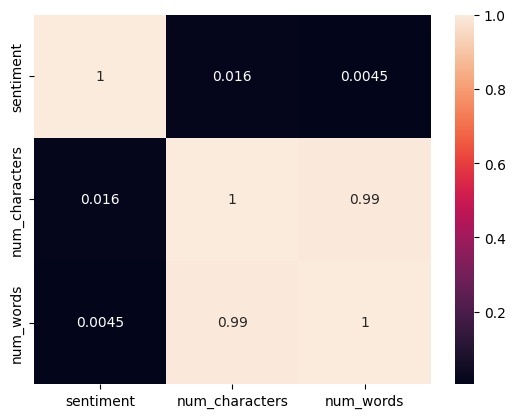

In [31]:
sns.heatmap(df.corr(),annot=True)

3. **Data** **Preprocessing**

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
def transform_text(text):

  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)

  text = y[:]
  y.clear()

  for i in text:
      y.append(ps.stem(i))


  return " ".join(y)

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [37]:
df['transformed_text'] = df['review'].apply(transform_text)

In [38]:
df.head()

,review,sentiment,num_characters,num_words,transformed_text
0,One of the other reviewers has mentioned that ...,1,1761,380,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,1,998,201,wonder littl product br br film techniqu fashi...
2,I thought this was a wonderful way to spend ti...,1,926,205,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,748,175,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,petter mattei love time money visual stun film...


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [40]:
positive_wc = wc.generate(df[df['sentiment'] == 1]['transformed_text'].str.cat(sep=" "))

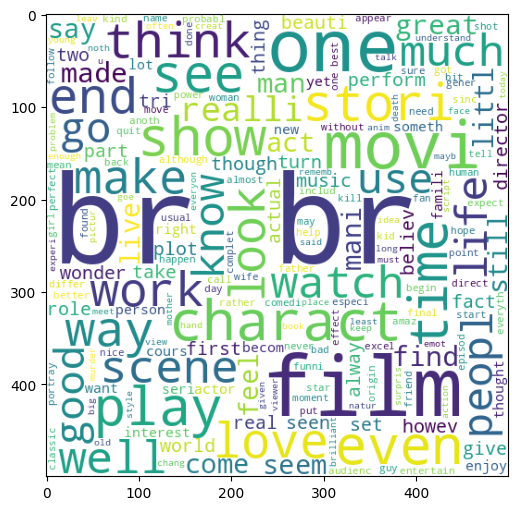

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

In [42]:
negative_wc = wc.generate(df[df['sentiment'] == 0]['transformed_text'].str.cat(sep=" "))

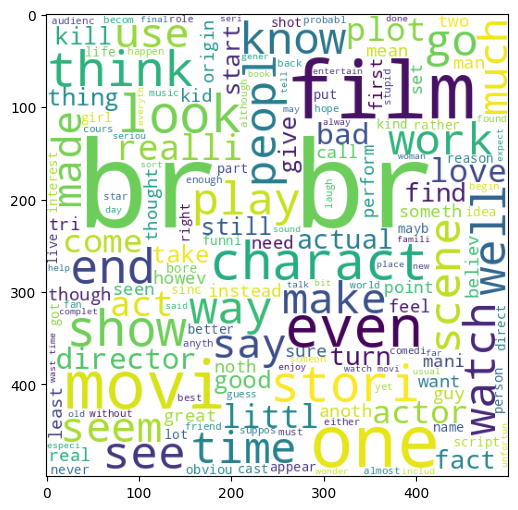

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [44]:
df.head()

,review,sentiment,num_characters,num_words,transformed_text
0,One of the other reviewers has mentioned that ...,1,1761,380,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,1,998,201,wonder littl product br br film techniqu fashi...
2,I thought this was a wonderful way to spend ti...,1,926,205,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,748,175,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,petter mattei love time money visual stun film...


In [45]:
positive_corpus = []
for msg in df[df['sentiment'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        positive_corpus.append(word)

In [46]:
len(positive_corpus)

2987643

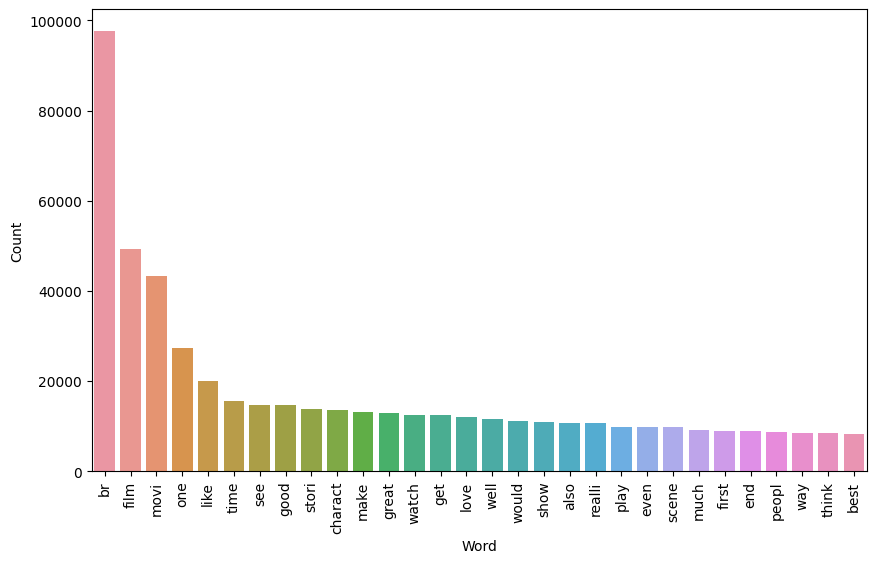

In [47]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'positive_corpus' is your list of data
positive_corpus = Counter(positive_corpus)
most_common_words = positive_corpus.most_common(30)
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()


In [48]:
negative_corpus = []
for msg in df[df['sentiment'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        negative_corpus.append(word)

In [49]:
len(negative_corpus)

2885636

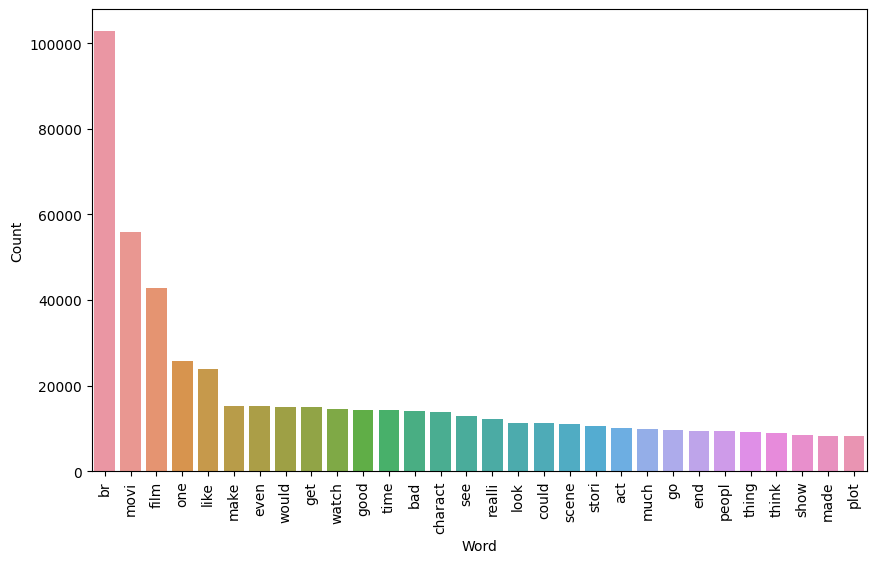

In [50]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'negative_corpus' is your list of data
negative_counter = Counter(negative_corpus)
most_common_words = negative_counter.most_common(30)
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()


In [51]:
# Text Vectorization
# using Bag of Words
df.drop(columns=['review'],inplace=True)

In [52]:
df.head()

,sentiment,num_characters,num_words,transformed_text
0,1,1761,380,one review mention watch 1 oz episod hook righ...
1,1,998,201,wonder littl product br br film techniqu fashi...
2,1,926,205,thought wonder way spend time hot summer weeke...
3,0,748,175,basic famili littl boy jake think zombi closet...
4,1,1317,283,petter mattei love time money visual stun film...


**4. Model Building**

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [55]:
X.shape

(49582, 3000)

In [56]:
y = df['sentiment'].values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7967127155389735
[[3911 1023]
 [ 993 3990]]
0.7959305804907241


In [62]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8456186346677422
[[4093  841]
 [ 690 4293]]
0.8361901051811453


In [63]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8429968740546536
[[4130  804]
 [ 753 4230]]
0.8402860548271752


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [67]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [68]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8765755772915196
Precision -  0.8675924115000978
For  KN
Accuracy -  0.7346979933447615
Precision -  0.7272902976420564
For  NB
Accuracy -  0.8456186346677422
Precision -  0.8361901051811453
For  DT
Accuracy -  0.6980941817081778
Precision -  0.6432790664169428
For  LR
Accuracy -  0.8798023595845518
Precision -  0.8669893514036786
For  RF
Accuracy -  0.8346274074821014
Precision -  0.8374722390470422
For  AdaBoost
Accuracy -  0.8078047796712715
Precision -  0.7851714550509731
For  BgC
Accuracy -  0.8042754865382676
Precision -  0.804078368652539
For  ETC
Accuracy -  0.8486437430674599
Precision -  0.8530008110300081
For  GBDT
Accuracy -  0.7828980538469296
Precision -  0.7428767593546173
For  xgb
Accuracy -  0.8400726026015932
Precision -  0.8189671361502348


In [69]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [70]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.876576,0.867592
4,LR,0.879802,0.866989
8,ETC,0.848644,0.853001
5,RF,0.834627,0.837472
2,NB,0.845619,0.836190
10,xgb,0.840073,0.818967
7,BgC,0.804275,0.804078
6,AdaBoost,0.807805,0.785171
9,GBDT,0.782898,0.742877
1,KN,0.734698,0.727290


In [71]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [72]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.876576
1,LR,Accuracy,0.879802
2,ETC,Accuracy,0.848644
3,RF,Accuracy,0.834627
4,NB,Accuracy,0.845619
5,xgb,Accuracy,0.840073
6,BgC,Accuracy,0.804275
7,AdaBoost,Accuracy,0.807805
8,GBDT,Accuracy,0.782898
9,KN,Accuracy,0.734698


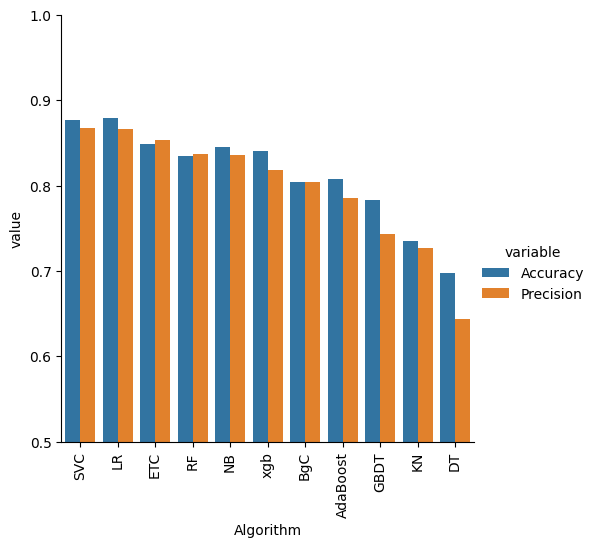

In [73]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [74]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [75]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [76]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.876576,0.867592,0.876576,0.867592
1,LR,0.879802,0.866989,0.879802,0.866989
2,ETC,0.848644,0.853001,0.848644,0.853001
3,RF,0.834627,0.837472,0.834627,0.837472
4,NB,0.845619,0.836190,0.845619,0.836190
5,xgb,0.840073,0.818967,0.840073,0.818967
6,BgC,0.804275,0.804078,0.804275,0.804078
7,AdaBoost,0.807805,0.785171,0.807805,0.785171
8,GBDT,0.782898,0.742877,0.782898,0.742877
9,KN,0.734698,0.727290,0.734698,0.727290


In [77]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [78]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [79]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [80]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8802057073711808
Precision 0.870388444270935


In [81]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [82]:
from sklearn.ensemble import StackingClassifier

In [83]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))